# Field Movement
We move in a rectangular $(n x m)$ grid, starting from tile $(1,1)$ and aiming
at reaching tile $(n,m)$.
- **state**: one of the grid tiles
- **actions**: at each tile we can either move forward by moving
    - north (N)
    - east (E)
    - north-east (NE)
- **cost**: given state $s=(i,j)$
$$
cost(s, a) = \left\{ \begin{matrix}
N & \rightarrow & 2i + j\\
E & \rightarrow & 2j + i\\
NE & \rightarrow & 3ij\\
\end{matrix}\right.
$$
- **successor**: given the state $(i,j)$
$$
successor(s, a) = \left\{ \begin{matrix}
N & (i,j+1)\\
E & (i+1,j)\\
NE & NE: (i+1,j+1)\\
\end{matrix}\right.
$$
- **end state**: $(n,m)$
- **goal**: find optimal route

In [1]:
from models import FieldMovement
import utils

In [2]:
model = FieldMovement(4, 4)

## Visualize state and options graph

In [3]:
import matplotlib.pyplot as plt

In [4]:
import networkx as nx

In [5]:
G = utils.to_graph(model)

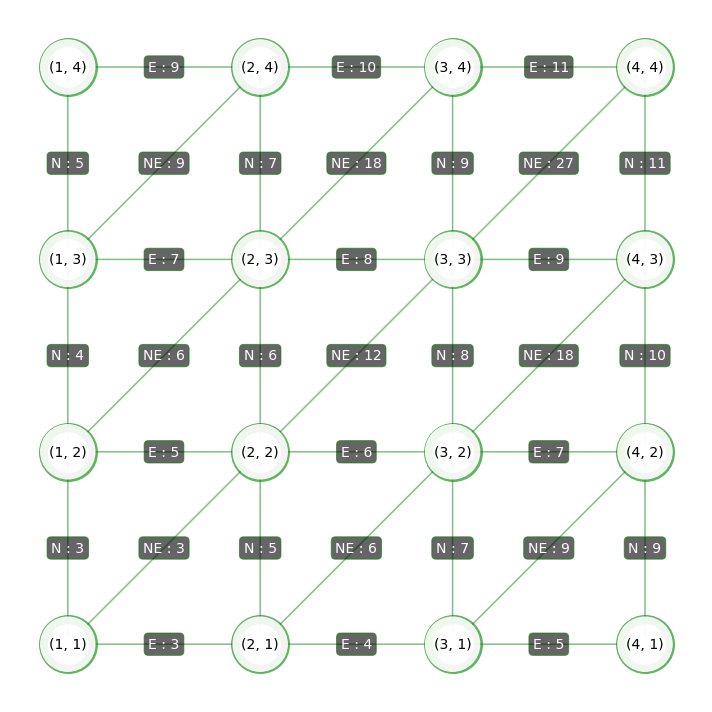

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
utils.draw_graph(graph=G, ax=ax)
plt.axis('off')
plt.tight_layout()
plt.show()

# Search algorithms

## Backtracking Search
Memory $O(N)$, Time: $O\left(b^N\right)$

with $b$ being the number of action per state and $N$ the depth of the search tree

In [7]:
import numpy as np
import pandas as pd
from IPython.display import display
import utils

In [8]:
from algorithms import backtracking_search

In [9]:
solutions, costs = backtracking_search(model)

### Best solution (one of)

In [10]:
best = np.argmin(costs)
plan = pd.DataFrame(solutions[best], columns=['action', 'next state', 'cost'])
display(plan)
print('Total cost', plan.cost.sum())

,action,next state,cost
0,NE,"(2, 2)",3
1,NE,"(3, 3)",12
2,N,"(3, 4)",9
3,E,"(4, 4)",11


Total cost 35


In [11]:
S = utils.search_graph(model, solutions)

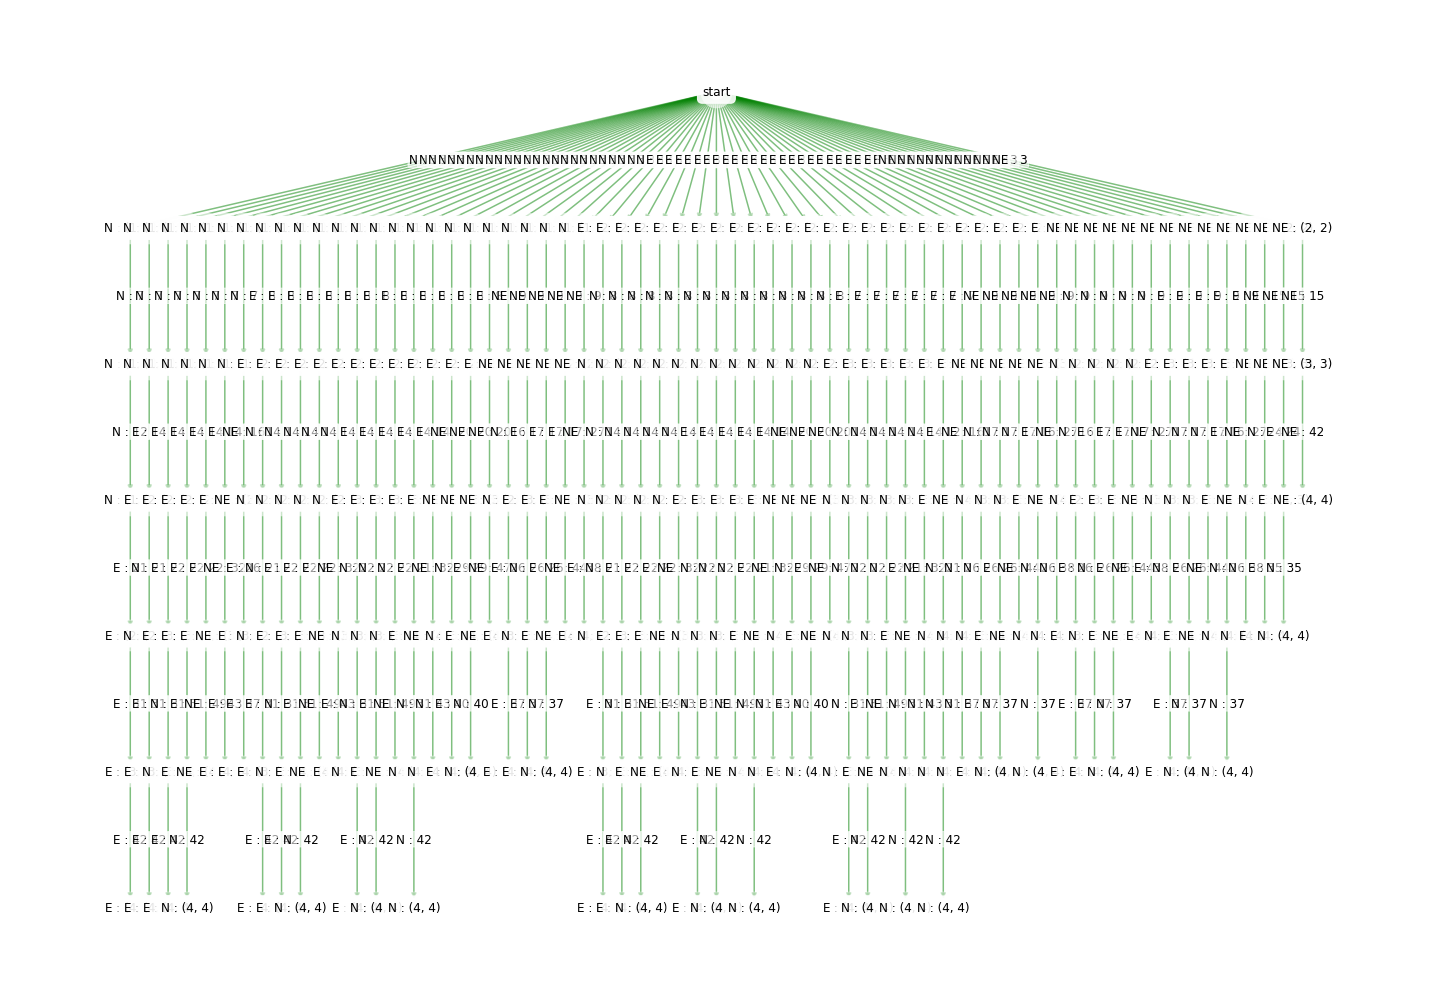

In [12]:
bb = dict(boxstyle="round, pad=0.1", fc="white", ec="white", alpha=0.6, mutation_scale=10)
bbn = dict(boxstyle="round, pad=0.4", fc="w", ec="white", alpha=0.9, mutation_scale=10)
pos = utils.hierarchy_pos(S)

fig, ax = plt.subplots(figsize=(20, 14))
utils.draw_graph(S, pos=pos, ax=ax, 
                         font_size=12, 
                         node_size=1000, 
                         box=bb, box_node=bbn,
                         node_font_color='black',
                         node_line=0,
                         edge_font_color='black'
                        )
plt.axis('off')
plt.tight_layout()
plt.show()